## Lexy Feldmann<br>Professor Metzger<br>DSC680 Applied Data Science

### Load in Libraries and the Retail Dataset

#### Load libraries

In [46]:
# Load in the necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

#### Load depression dataset

In [66]:
# Load in the retail dataset from Github
retail_data = pd.read_csv(r'https://raw.githubusercontent.com/lexyfeldmann/Marketing-RetailSales/refs/heads/main/shopping_behavior_updated.csv',
                          sep=',')

# Ensure that it was loaded in
retail_data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Exploratory Data Analysis - Groupings

#### Look at count of purchases in each Category by Location

In [67]:
# Group the data by Location and look at the counts in each Category
locationbycategory = retail_data.groupby("Location")["Category"].value_counts()

# Print the findings
print(locationbycategory)

Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64


#### Look at Purchase Amount SUM by Location

In [68]:
# Group the data by Location and look at the sum of the Purchase Amount (USD) column
amountbylocation = retail_data.groupby("Location")["Purchase Amount (USD)"].sum()

# Print the findings in descending order
print(amountbylocation.sort_values(ascending=False))

Location
Montana           5784
Illinois          5617
California        5605
Idaho             5587
Nevada            5514
Alabama           5261
New York          5257
North Dakota      5220
West Virginia     5174
Nebraska          5172
New Mexico        5014
Minnesota         4977
Pennsylvania      4926
Mississippi       4883
Alaska            4867
Vermont           4860
Louisiana         4848
Virginia          4842
Arkansas          4828
Maryland          4795
Tennessee         4772
Delaware          4758
North Carolina    4742
Texas             4712
Missouri          4691
Indiana           4655
Ohio              4649
Georgia           4645
Washington        4623
Michigan          4533
Utah              4443
South Carolina    4439
Kentucky          4402
Maine             4388
Massachusetts     4384
Oklahoma          4376
Arizona           4326
Wyoming           4309
Oregon            4243
South Dakota      4236
Connecticut       4226
Colorado          4222
New Hampshire     4219
Io

#### Look at Purchase Amount SUM by Shipping Type

In [69]:
# Group the data by Shipping Type and look at the sum of the Purchase Amount (USD) column
amountbyshipping = retail_data.groupby("Shipping Type")["Purchase Amount (USD)"].sum()

# Print the findings
print(amountbyshipping)

Shipping Type
2-Day Shipping    38080
Express           39067
Free Shipping     40777
Next Day Air      37993
Standard          38233
Store Pickup      38931
Name: Purchase Amount (USD), dtype: int64


#### Look at Details by each Location

In [70]:
# Group the retail_data by locations and store this new dataframe in a 'locations' variable
locations = retail_data.groupby("Location")

# For each location, do (and print) the following
for location, data in locations:
    # Print the location so we know what data we are looking at
    print(location)
    # Calculate average purchase amount in for this location and print it
    avg_amount = data["Purchase Amount (USD)"].mean()
    print('Average Purchase Amount: $', avg_amount)
    # Grab the most popular product category in this location and print it
    category = data["Category"].value_counts().idxmax()
    print('Most Popular Category: ', category)
    # Grab the most popular shipping type at this location and print it
    shipping = data["Shipping Type"].value_counts().idxmax()
    print('Most Popular Shipping Type: ', shipping)
    print('\n')

Alabama
Average Purchase Amount: $ 59.1123595505618
Most Popular Category:  Clothing
Most Popular Shipping Type:  Express


Alaska
Average Purchase Amount: $ 67.59722222222223
Most Popular Category:  Clothing
Most Popular Shipping Type:  Standard


Arizona
Average Purchase Amount: $ 66.55384615384615
Most Popular Category:  Clothing
Most Popular Shipping Type:  Express


Arkansas
Average Purchase Amount: $ 61.11392405063291
Most Popular Category:  Clothing
Most Popular Shipping Type:  Next Day Air


California
Average Purchase Amount: $ 59.0
Most Popular Category:  Clothing
Most Popular Shipping Type:  Next Day Air


Colorado
Average Purchase Amount: $ 56.29333333333334
Most Popular Category:  Clothing
Most Popular Shipping Type:  Store Pickup


Connecticut
Average Purchase Amount: $ 54.17948717948718
Most Popular Category:  Clothing
Most Popular Shipping Type:  Next Day Air


Delaware
Average Purchase Amount: $ 55.325581395348834
Most Popular Category:  Clothing
Most Popular Shipping 

### Exploratory Data Analysis - Visualizations

#### Look at each Season and their average Purchase Amounts

Text(0, 0.5, 'Average Purchase Amount (USD)')

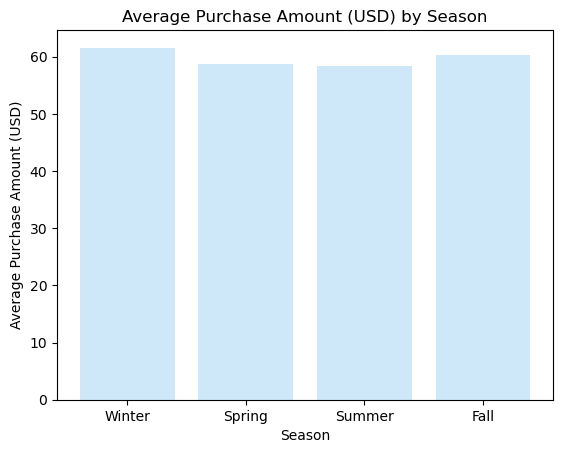

In [71]:
# Grab the seasons from the Season column
seasons = retail_data['Season'].unique()

# Group the retail dataset by Season and grab each Season's avg purchase amount
purchasebyseason = retail_data.groupby('Season')['Purchase Amount (USD)'].mean()

# Create a bar graph of Season by Avg Purchase Amount and make the bars blue
plt.bar(seasons, purchasebyseason, color='#CFE8F9')

# Add a title
plt.title("Average Purchase Amount (USD) by Season")

# Add x and y axis labels
plt.xlabel("Season")
plt.ylabel("Average Purchase Amount (USD)")

#### Look at each item Category and their average Purchase Amounts

Text(0, 0.5, 'Average Purchase Amount (USD)')

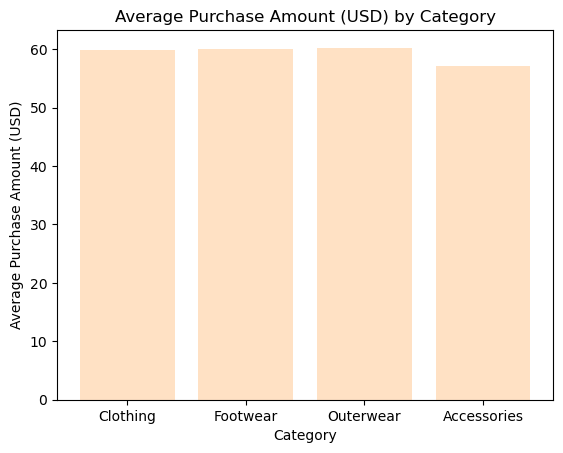

In [72]:
# Grab the categories from the Category column
categories = retail_data['Category'].unique()

# Group the retail dataset by Category and grab each Category's avg purchase amount
purchasebycategory = retail_data.groupby('Category')['Purchase Amount (USD)'].mean()

# Create a bar graph of Category by Avg Purchase Amount and make the bars orange
plt.bar(categories, purchasebycategory, color='#FFE1C4')

# Add a title
plt.title("Average Purchase Amount (USD) by Category")

# Add x and y axis labels
plt.xlabel("Category")
plt.ylabel("Average Purchase Amount (USD)")

#### Look at the number of purchases by item Category

Text(0, 0.5, 'Count of Purchases')

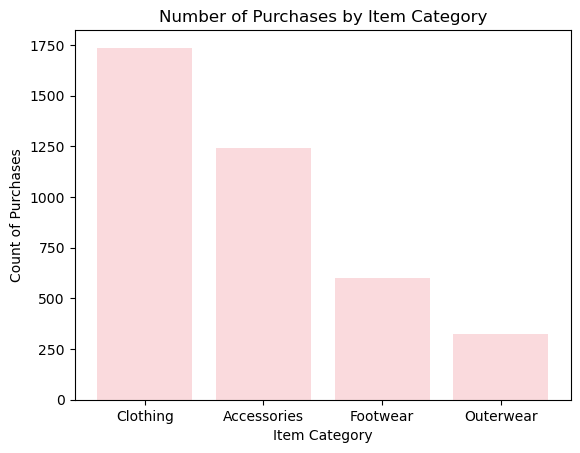

In [73]:
# Grab the count of each value in the Category column
category_counts = retail_data['Category'].value_counts()

# Plot the bar chart using a pink color
bars = plt.bar(category_counts.index, category_counts.values, color='#FADADD')

# Add title
plt.title('Number of Purchases by Item Category')

# Add x and y axis labels
plt.xlabel('Item Category')
plt.ylabel('Count of Purchases')

#### Look at each item Gender and their total Purchase Amounts

Text(0.5, 1.0, 'Percent of Total Purchase Amount (USD) by Gender')

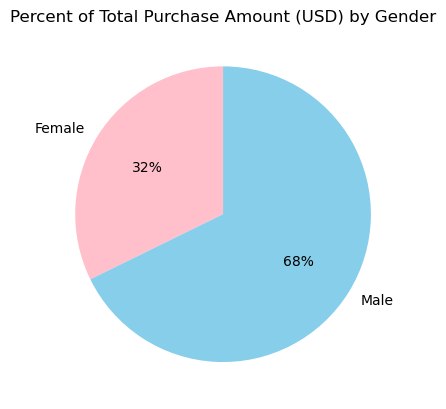

In [74]:
# Group retail dataset by Gender and sum Purchase Amount (USD) column
purchasebygender = retail_data.groupby('Gender')['Purchase Amount (USD)'].sum()

# Create labels from the index
labels = purchasebygender.index

# Plot the pie chart
plt.pie(purchasebygender, labels=labels, colors=['pink', 'skyblue'], autopct='%1.0f%%', startangle=90)

# Add a title
plt.title('Percent of Total Purchase Amount (USD) by Gender')

#### Look at how many customers used a Promo Code vs. how many did not

Text(0.5, 1.0, 'Percent of Purchases with Promo Used vs. Not')

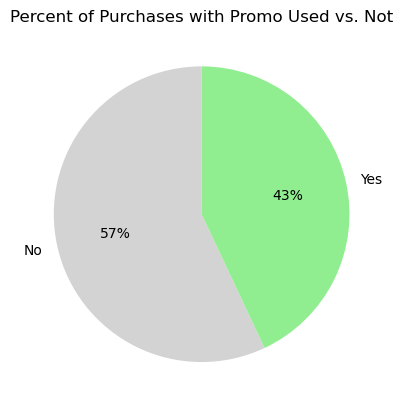

In [75]:
# Grab the count of each value of 'yes' and 'no' in the Promo Code Used column
promoused = retail_data['Promo Code Used'].value_counts()

# Create pie chart
plt.pie(promoused, labels=promoused.index, autopct='%1.0f%%', startangle=90, colors=['lightgray', 'lightgreen'])

# Add a title
plt.title("Percent of Purchases with Promo Used vs. Not")

#### Look at the number of customers purchasing at each Location

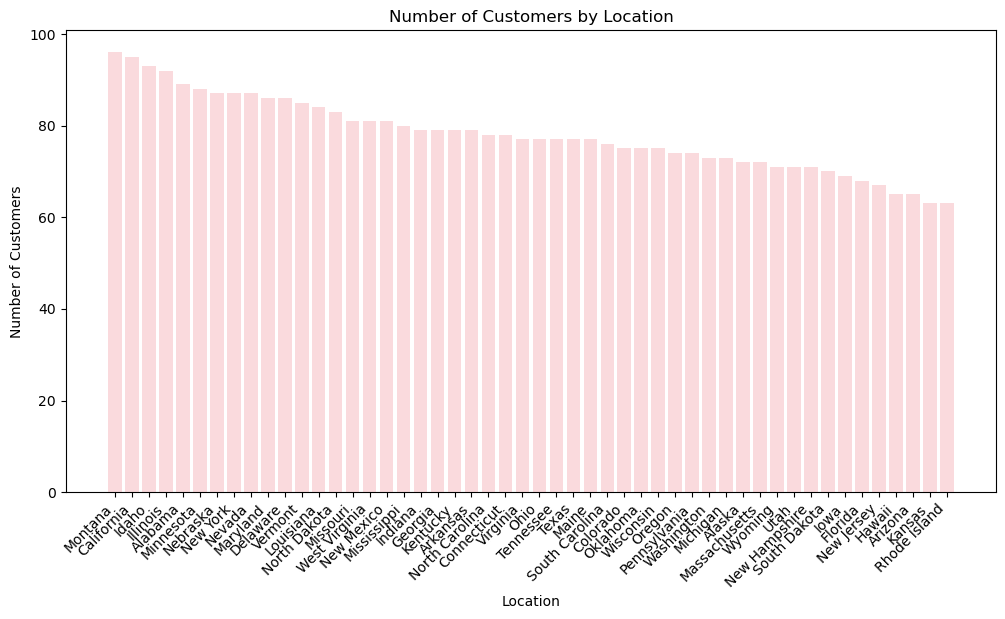

In [76]:
# Grab the count of each value in the Location column
location_counts = retail_data['Location'].value_counts()

# Make sure the plot is bigger so that the data displays properly
plt.figure(figsize=(12, 6))

# Plot the bar chart using a purple color
bars = plt.bar(location_counts.index, location_counts.values, color='#FADADD')

# Add a title
plt.title("Number of Customers by Location")

# Add x and y axis labels
plt.xlabel("Location")
plt.ylabel("Number of Customers")

# Rotate x axis labels
plt.xticks(rotation=45, ha='right')

# Plot graph without text output
plt.show()

#### Look at the locations where there are the most buyers by the item categories

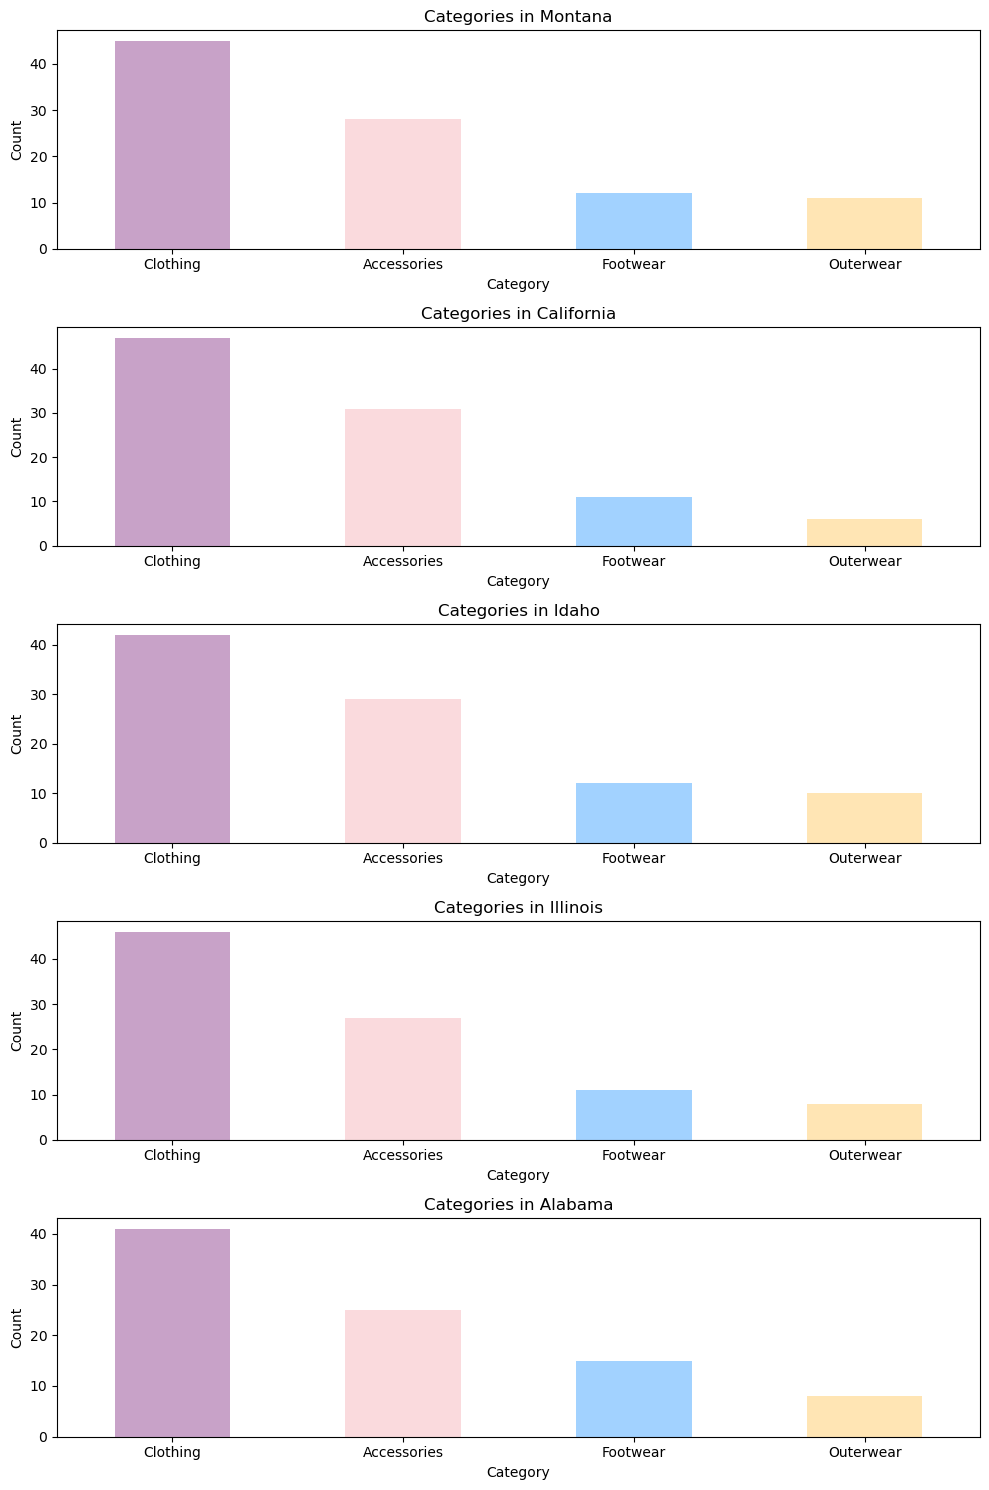

In [77]:
# Grab the top 5 locations with the most buyers
top_locations = retail_data['Location'].value_counts().head(5).index

# Colors for the plot
plot_colors = ['#C8A2C8', '#FADADD', '#A2D2FF', '#FFE5B4']

# Create a subplot grid for each location
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Go through each top location and create category distribution plots with different colors
for i, location in enumerate(top_locations):
    location_data = retail_data[retail_data['Location'] == location]
    # Count the most common item categories in this location
    category_counts = location_data['Category'].value_counts().head(10)
    # Set 'ax' to the current subplot
    ax = axes[i]
    # Create the plot for the category counts
    category_counts.plot(kind='bar', ax=ax, color=plot_colors)
    # Add title
    ax.set_title(f"Categories in {location}")
    # Add x and y axis labe;s
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    # Make sure labels look normal
    ax.set_xticklabels(category_counts.index, rotation=0)

# Adjust layout so that all graphs fit properly
plt.tight_layout()

# Show the plot without text output
plt.show()

#### Look at item categories between age groups

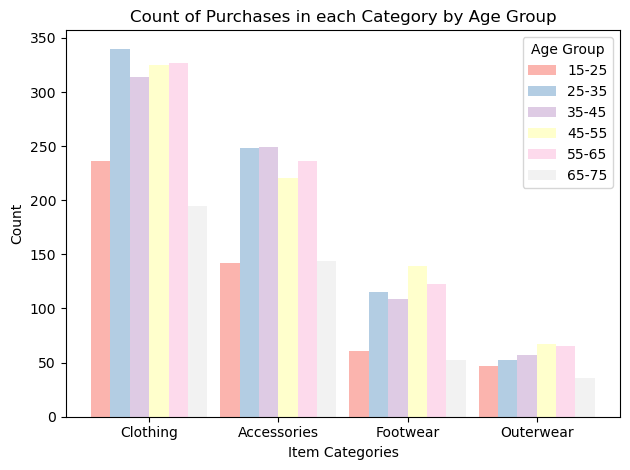

In [78]:
# Define the age groups and store in a variable
age_groups = [15, 25, 35, 45, 55, 65]

# Create subplots for each age group
fig, ax = plt.subplots()

# Create a pastel colormap for age groups
colors = plt.cm.Pastel1(np.linspace(0, 1, len(age_groups)))

# Create a dictionary to store category counts for each age group
category_counts_by_age = {age: [] for age in age_groups}

# Calculate category counts for each age group
for age in age_groups:
    age_group_data = retail_data[(retail_data['Age'] >= age) & (retail_data['Age'] < age + 10)]
    category_counts = age_group_data['Category'].value_counts()
    category_counts_by_age[age] = category_counts

# Create the bar chart
chart = np.arange(len(category_counts_by_age[age_groups[0]].index))

# Create the legend
for i, age in enumerate(age_groups):
    category_counts = category_counts_by_age[age]
    ax.bar(chart + i * 0.15, category_counts, width=0.15, label=f'{age}-{age+10}', color=colors[i])

# Add title
ax.set_title('Count of Purchases in each Category by Age Group')    
    
# Add x and y axis labels
ax.set_xlabel('Item Categories')
ax.set_ylabel('Count')

# Make sure the x axis tick marks and labels are properly on the graph
ax.set_xticks(chart + 0.15 * (len(age_groups) - 1) / 2)
ax.set_xticklabels(category_counts_by_age[age_groups[0]].index)

# Add a title to the legend
ax.legend(title='Age Group')

# Fix formatting of the chart
plt.tight_layout()

### Predictive Modeling

#### Create customer segments (clusters)

In [79]:
# Create quantile-based segments where any purchase amount above quantile 0.66 is high, else it is not high
retail_data['Customer_Segment'] = np.where(
    retail_data['Purchase Amount (USD)'] >= retail_data['Purchase Amount (USD)'].quantile(0.66),
    'High',
    'Not High'
)

# Create a LabelEncoder object to convert categorical labels into numeric codes
labelenc = LabelEncoder()

# Assign numeric code to Customer_Segment column and store in the 'Segment_Code' column
retail_data['Segment_Code'] = labelenc.fit_transform(retail_data['Customer_Segment'])

#### Define features and target for predictive modeling

In [80]:
# Define features and store in a variable
features = ['Promo Code Used', 'Frequency of Purchases', 'Subscription Status',
           'Gender', 'Category', 'Location', 'Season', 'Shipping Type', 'Discount Applied', 'Previous Purchases',
           'Payment Method']

# Set features
features_train = retail_data[features]

# Set target variable
target_train = retail_data['Segment_Code']

# Convert categorical variables to dummy variables and store back into features_train
features_train = pd.get_dummies(features_train, drop_first=True)

# Create StandardScaler object
scaler = StandardScaler()

# Scale features
features_scaled = scaler.fit_transform(features_train)

#### Train the model

In [81]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_train, test_size=0.25, random_state=42)

# Create a Logistic Regression model
lr_model = LogisticRegression(class_weight = 'balanced', solver='liblinear')

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Grab the predictions from the model
predictions = lr_model.predict(X_test)

# Print the classification report of the Logistic Regression
print(classification_report(y_test, predictions, target_names=labelenc.classes_))

              precision    recall  f1-score   support

        High       0.33      0.48      0.39       319
    Not High       0.68      0.54      0.60       656

    accuracy                           0.52       975
   macro avg       0.51      0.51      0.50       975
weighted avg       0.57      0.52      0.53       975



#### Create confusion matrix

Text(50.722222222222214, 0.5, 'Actual')

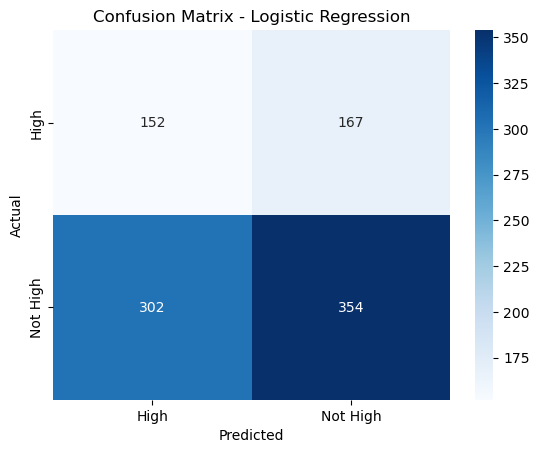

In [82]:
# Create the confusion matrix from the true labels and predictions
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labelenc.classes_, yticklabels=labelenc.classes_)

# Add a title
plt.title("Confusion Matrix - Logistic Regression")

# Add x and y axis labels
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### Use kmeans clustering to look at each cluster and their Frequency of Previous Purchases

In [83]:
# Create a KMeans clustering model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model on the 'Previous Purchases' column and assign each customer to a cluster (added to new column 'Cluster')
retail_data['Cluster'] = kmeans.fit_predict(retail_data[['Previous Purchases']])

In [84]:
# Grab the average number of previous purchases by cluster
cluster_summary = retail_data.groupby('Cluster')[['Previous Purchases']].mean()

# Print this out
print(cluster_summary, '\n')

# Frequency distribution per cluster
freq_dist = retail_data.groupby('Cluster')['Frequency of Purchases'].value_counts(normalize=True)

# Print this out
print(freq_dist)

         Previous Purchases
Cluster                    
0                 37.419067
1                 12.465005 

Cluster  Frequency of Purchases
0        Quarterly                 0.159881
         Weekly                    0.143992
         Every 3 Months            0.143496
         Monthly                   0.141509
         Fortnightly               0.141013
         Annually                  0.136544
         Bi-Weekly                 0.133565
1        Annually                  0.157476
         Every 3 Months            0.156416
         Bi-Weekly                 0.147402
         Monthly                   0.142100
         Fortnightly               0.136797
         Weekly                    0.132025
         Quarterly                 0.127784
Name: proportion, dtype: float64
